In [1]:
!pip install kaggle

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105797 sha256=ad14b19a451e86e3671bdd97fbe4d1af3537b1f9a37c489208139d819eb1f6ae
  Stored in directory: c:\users\doguk\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import json

# Specify the path to your kaggle.json file
kaggle_json_path = 'kaggle.json'

# Load the kaggle.json file
with open(kaggle_json_path, 'r') as file:
    kaggle_creds = json.load(file)

# Create the necessary directory to store kaggle.json
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Move the kaggle.json file to the ~/.kaggle directory
with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as file:
    json.dump(kaggle_creds, file)

# Set the appropriate permissions
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

# Verify the setup by checking your Kaggle datasets
!kaggle datasets list


ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned     Students Performance | Clean Dataset                10KB  2024-10-29 19:32:26           4629         83  1.0              
ironwolf437/laptop-price-dataset                             Laptop Price - dataset‏                             25KB  2024-11-12 15:50:44            967         27  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset       11KB  2024-09-28 20:21:12          25747        512  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercis

**Downloading Dataset**


In [3]:
!kaggle datasets download -d uzairkhan45/breast-cancer-patients-mris --force


Dataset URL: https://www.kaggle.com/datasets/uzairkhan45/breast-cancer-patients-mris
License(s): CC0-1.0




  0%|          | 0.00/56.9M [00:00<?, ?B/s]
  2%|▏         | 1.00M/56.9M [00:00<00:22, 2.63MB/s]
  7%|▋         | 4.00M/56.9M [00:00<00:05, 10.1MB/s]
 11%|█         | 6.00M/56.9M [00:00<00:04, 12.8MB/s]
 19%|█▉        | 11.0M/56.9M [00:00<00:02, 22.9MB/s]
 25%|██▍       | 14.0M/56.9M [00:00<00:02, 17.5MB/s]
 30%|██▉       | 17.0M/56.9M [00:01<00:02, 14.4MB/s]
 35%|███▌      | 20.0M/56.9M [00:01<00:02, 16.0MB/s]
 39%|███▊      | 22.0M/56.9M [00:01<00:02, 16.8MB/s]
 42%|████▏     | 24.0M/56.9M [00:01<00:01, 17.5MB/s]
 46%|████▌     | 26.0M/56.9M [00:01<00:01, 18.2MB/s]
 49%|████▉     | 28.0M/56.9M [00:01<00:01, 18.7MB/s]
 53%|█████▎    | 30.0M/56.9M [00:01<00:01, 18.8MB/s]
 56%|█████▋    | 32.0M/56.9M [00:02<00:01, 19.0MB/s]
 60%|█████▉    | 34.0M/56.9M [00:02<00:01, 19.5MB/s]
 63%|██████▎   | 36.0M/56.9M [00:02<00:01, 19.9MB/s]
 67%|██████▋   | 38.0M/56.9M [00:02<00:00, 19.9MB/s]
 70%|███████   | 40.0M/56.9M [00:02<00:00, 19.9MB/s]
 74%|███████▍  | 42.0M/56.9M [00:02<00:00, 19.9MB/s]
 

In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/breast-cancer-patients-mris.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

PermissionError: [Errno 13] Permission denied: 'c:\\Users\\doguk\\OneDrive\\Masaüstü\\BreastCancerCNN-main'

In [7]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB ? eta -:--:--
    --------------------------------------- 0.8/38.8 MB 2.8 MB/s eta 0:00:14
   - -------------------------------------- 1.8/38.8 MB 3.9 MB/s eta 0:00:10
   -- ------------------------------------- 2.9/38.8 MB 4.2 MB/s eta 0:00:09
   ---- ----------------------------------- 3.9/38.8 MB 4.5 MB/s eta 0:00:08
   ----- ---------------------------------- 5.5/38.8 MB 5.0 MB/s eta 0:00:07
   ------- -------------------------------- 7.1/38.8 MB 5.3 MB/s eta 0:00:06
   --------- ------------------------------ 8.9/38.8 MB 5.9 MB/s eta 0:00:06
   ---------- ----------------------------- 10.0/38.8 MB 6.0 MB/s eta 0:00:05
   ----------- ---------------------------- 10.7/38.8 MB 5.7 MB/s eta 0:00:05
   ------------ --------------------------- 12.6/38.8 MB 6.0 MB/s eta 0:00:05
   -------------- ------------------------- 14.4/38.8 MB 6.2 MB/s eta 0:00:04
   ------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Impoerting Dependancies**

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split


In [14]:
# Doğru dosya yolu
train_h = os.listdir(r'C:\Users\doguk\OneDrive\Masaüstü\Breast Cancer Patients MRI\train\Healthy')
print(train_h[:5])  # İlk 5 dosyayı yazdır

['H_1.jpg', 'H_10.jpg', 'H_100.jpg', 'H_101.jpg', 'H_102.jpg']


In [15]:
# Doğru dosya yolu
train_s = os.listdir(r'C:\Users\doguk\OneDrive\Masaüstü\Breast Cancer Patients MRI\train\Sick')
print(train_h[:5])  # İlk 5 dosyayı yazdır

['H_1.jpg', 'H_10.jpg', 'H_100.jpg', 'H_101.jpg', 'H_102.jpg']


In [16]:

# Görüntülerin sayısını yazdır
print('Number of healthy images:', len(train_h))
print('Number of sick images:', len(train_s))

Number of healthy images: 700
Number of sick images: 700


**Making 2 classes out of the data**

Has cancer  -->  1

Doesn't have Cancer  -->  0

In [17]:
#create the labels
train_h_labels = [1]*700
train_s_labels = [0]*700

In [18]:
print(train_h_labels[:5])
print(train_s_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [19]:
labels = train_h_labels + train_s_labels
print(labels[:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**displaying the images**


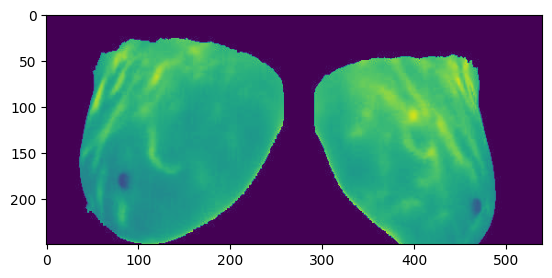

In [21]:
#disply with mask image
img = mpimg.imread(r'C:\Users\doguk\OneDrive\Masaüstü\Breast Cancer Patients MRI\train\Healthy/H_607.jpg')

plt.imshow(img)

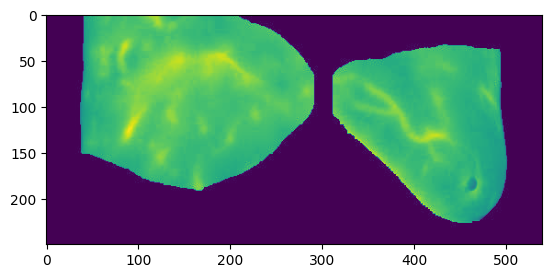

In [34]:
#disply with mask image
img = mpimg.imread(r'C:\Users\doguk\OneDrive\Masaüstü\Breast Cancer Patients MRI\train/Sick/S_626.jpg')

plt.imshow(img)

**Image processing**

1- Resize the images

2- Convert the images to numpy arrays


In [37]:

import os

path = r"C:\Users\doguk\OneDrive\Masaüstü\Breast Cancer Patients MRI\train\Sick"

if os.access(path, os.R_OK):
    print("Dosya okunabilir.")
else:
    print("Dosyaya erişim izni yok.")


Dosya okunabilir.


In [42]:
# convert images to numpy arrays+

# train_h_path = r'C:\Users\doguk\OneDrive\Masaüstü\Breast Cancer Patients MRI\train\Healthy'

# data = []

# for img_file in train_h:

#   image = Image.open(train_h_path , img_file)
#   image = image.resize((128,128))
#   image = image.convert('RGB')
#   image = np.array(image)
#   data.append(image)



# train_s_path =  r'C:\Users\doguk\OneDrive\Masaüstü\Breast Cancer Patients MRI\train\Sick'


# for img_file in train_s:

#   image = Image.open(train_s_path , img_file)
#   image = image.resize((128,128))
#   image = image.convert('RGB')
#   image = np.array(image)
#   data.append(image)
import os
import numpy as np
from PIL import Image

train_h_path = r'C:\Users\doguk\OneDrive\Masaüstü\Breast Cancer Patients MRI\train\Healthy'
train_s_path = r'C:\Users\doguk\OneDrive\Masaüstü\Breast Cancer Patients MRI\train\Sick'

data = []

# Sağlıklı görüntülerin yüklenmesi
for img_file in os.listdir(train_h_path):  # Dizindeki dosyaları listele
    file_path = os.path.join(train_h_path, img_file)  # Tam dosya yolunu oluştur
    try:
        image = Image.open(file_path)  # Görüntüyü aç
        image = image.resize((128, 128))  # Görüntüyü yeniden boyutlandır
        image = image.convert('RGB')  # RGB formatına dönüştür
        image = np.array(image)  # Numpy dizisine dönüştür
        data.append(image)  # Listeye ekle
    except Exception as e:
        print(f"Dosya okunurken hata oluştu: {file_path}, Hata: {e}")

# Hasta görüntülerin yüklenmesi
for img_file in os.listdir(train_s_path):  # Dizindeki dosyaları listele
    file_path = os.path.join(train_s_path, img_file)  # Tam dosya yolunu oluştur
    try:
        image = Image.open(file_path)  # Görüntüyü aç
        image = image.resize((128, 128))  # Görüntüyü yeniden boyutlandır
        image = image.convert('RGB')  # RGB formatına dönüştür
        image = np.array(image)  # Numpy dizisine dönüştür
        data.append(image)  # Listeye ekle
    except Exception as e:
        print(f"Dosya okunurken hata oluştu: {file_path}, Hata: {e}")


In [27]:
type(data)

list

In [43]:
len(data)

1400

In [44]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [45]:
#convert image list and label list into numpy arrays
X = np.array(data)
Y = np.array(labels)

In [46]:
type(X)
type(Y)

numpy.ndarray

In [47]:
print(X.shape)
print(Y.shape)

(1400, 128, 128, 3)
(1400,)


**Train_Test_Split**

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
print (X.shape, X_train.shape, X_test.shape)

(1400, 128, 128, 3) (1120, 128, 128, 3) (280, 128, 128, 3)


In [50]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [51]:
X_train_scaled[3]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

**Building a convolutional neuralnetwork**

In [52]:
import tensorflow as tf
import keras
from keras import regularizers

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())

# Making a regularization to decresae the overfitting
model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.003)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.003)))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

c:\Users\doguk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
#compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [54]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs = 20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 214ms/step - acc: 0.5646 - loss: 1.7359 - val_acc: 0.6964 - val_loss: 1.1466
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - acc: 0.7341 - loss: 1.0557 - val_acc: 0.8482 - val_loss: 0.8571
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - acc: 0.8754 - loss: 0.8031 - val_acc: 0.9196 - val_loss: 0.6379
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - acc: 0.9102 - loss: 0.6228 - val_acc: 0.9018 - val_loss: 0.5929
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - acc: 0.9589 - loss: 0.5044 - val_acc: 0.9286 - val_loss: 0.5126
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - acc: 0.9364 - loss: 0.4952 - val_acc: 0.9286 - val_loss: 0.4917
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - acc: 0.9530 - loss: 0.4671 - val_acc: 0.9196 - val_loss: 0.4836
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - acc: 0.9513 - loss: 0.4354 - val_acc: 0.9375 - val_loss: 0.4362
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - ac

**Final Accuracy For Test Data**

In [55]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - acc: 0.9632 - loss: 0.3720
Test Accuracy = 0.9642857313156128


In [56]:
model.save_weights("model_weights.weights.h5")


**Illustrating Loss & Accuracy**

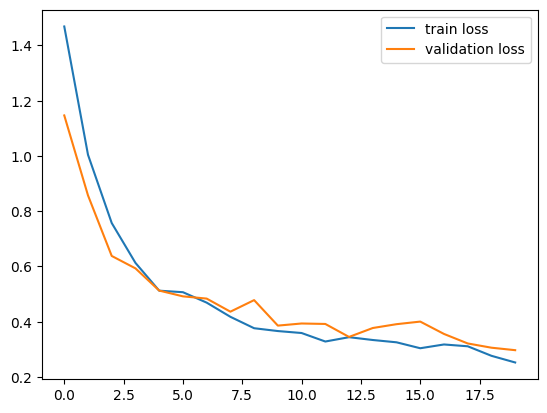

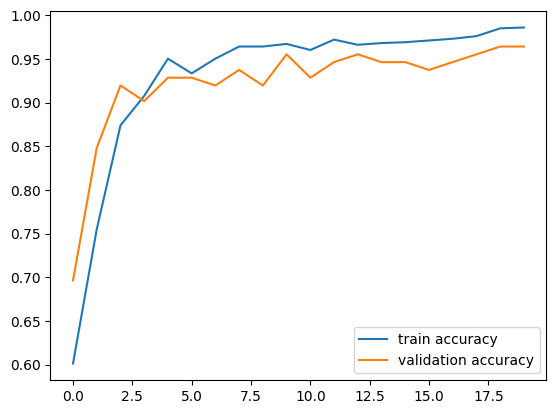

In [57]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Buildnig Predictive System**

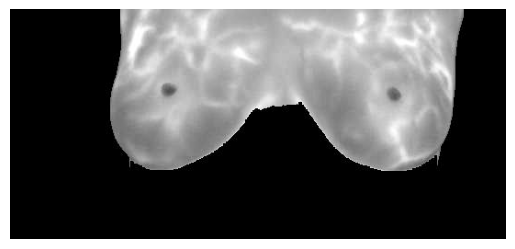

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[0.01301361 0.9370805 ]]
1
The person does not have cancer


In [61]:
import matplotlib.pyplot as plt
import cv2

input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

# OpenCV görselleri BGR formatında okur, bunu RGB'ye çevirelim
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Görseli matplotlib ile göster
plt.imshow(input_image_rgb)
plt.axis('off')  # Ekseni gizle
plt.show()

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
    print('The person does not have cancer')
else:
    print('The person has cancer')
